In [46]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns

In [47]:
df = pd.read_csv(r'C:\Users\91936\Desktop\Datasets\Movie\movies.csv', encoding='unicode_escape')

In [48]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [49]:
#Data Cleaning

In [50]:
df.dropna(inplace = True)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [51]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [52]:
df['cyear'] = df['released'].astype(str).str[0:4]

In [53]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [54]:
df['name'].drop_duplicates().sort_values(ascending=False)

4722                     Ãon Flux
4761       xXx: State of the Union
7112    xXx: Return of Xander Cage
4083                           xXx
3503                      eXistenZ
                   ...            
5344                     10,000 BC
393                 10 to Midnight
3452    10 Things I Hate About You
6906           10 Cloverfield Lane
1099       *batteries not included
Name: name, Length: 5336, dtype: object

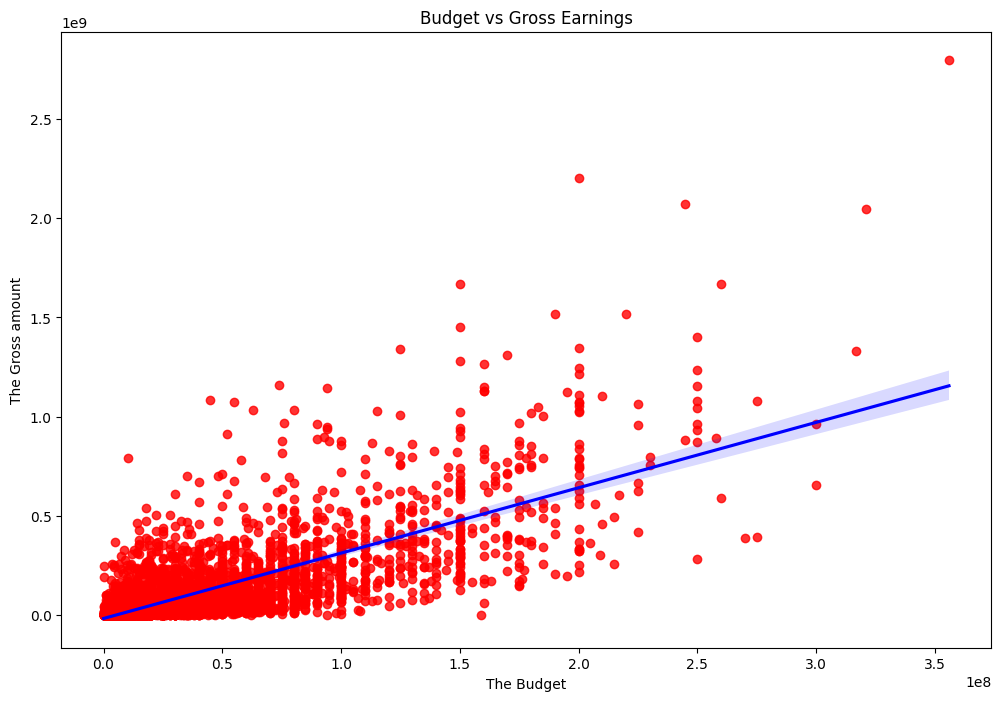

In [61]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('The Budget')
plt.ylabel('The Gross amount')
plt.show()

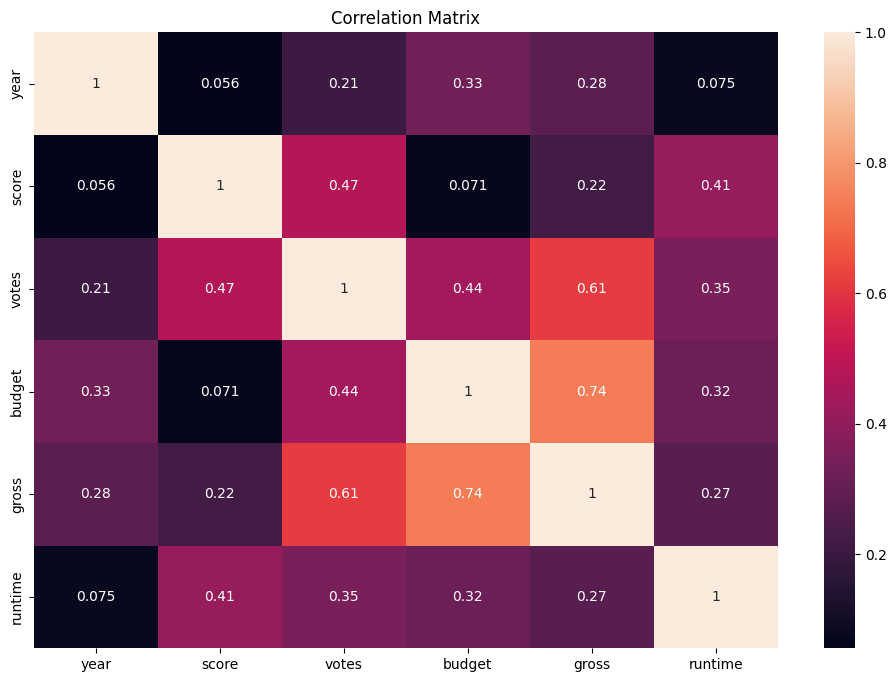

In [66]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr(method='pearson') #kendall is default here can use person or spearman 
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [67]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == object):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,cyear
7445,387,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,5
3045,4908,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,7
6663,3642,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,7
7244,388,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,5
7480,4387,4,2,2019,1126,6.9,222000.0,1012,1361,457,47,260000000,1670727580,1423,118.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3793,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,9
2434,2968,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,11
3681,1594,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,13
272,2908,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,12


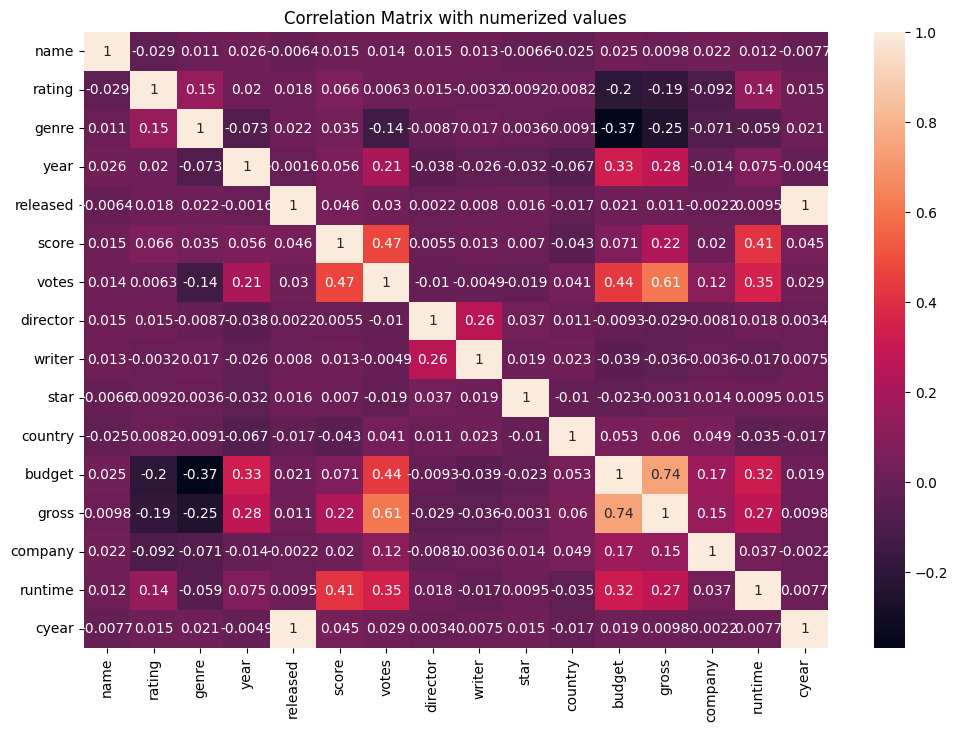

In [71]:

correlation_matrix = df_numerized.corr(method='pearson') #kendall is default here can use person or spearman 
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix with numerized values')
plt.show()

In [86]:
correlation_mat = df_numerized.corr(method='pearson')
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368243
genre    budget    -0.368243
         gross     -0.245628
gross    genre     -0.245628
budget   rating    -0.204196
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
cyear    cyear      1.000000
Length: 256, dtype: float64

In [ ]:
# Votes and Budgets have the highest correlation to gross earnings
# Votes and Scores also have a high correlation